In [4]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, LinearRegression, Lasso
from sklearn.model_selection import train_test_split as TTS
from sklearn.datasets import fetch_california_housing as fch
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

Missing colon in file WindowsPath('d:/ProgramData/Anaconda3/envs/learn-ml/lib/site-packages/matplotlib/mpl-data/matplotlibrc'), line 256 ('<!-- #font.family:  sans-serif -->')
Missing colon in file 'd:\\ProgramData\\Anaconda3\\envs\\learn-ml\\lib\\site-packages\\matplotlib\\mpl-data\\matplotlibrc', line 256 ('<!-- #font.family:  sans-serif -->')


In [5]:
housevalue = fch()
X = pd.DataFrame(housevalue.data)
y = housevalue.target

In [6]:
X = pd.DataFrame(housevalue.data)
y = housevalue.target
X.columns = ["住户收入中位数","房屋使用年代中位数","平均房间数目" ,"平均卧室数目","街区人口","平均入住率","街区的纬度","街区的经度"]
X.head()

,住户收入中位数,房屋使用年代中位数,平均房间数目,平均卧室数目,街区人口,平均入住率,街区的纬度,街区的经度
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [7]:
Xtrain,Xtest,Ytrain,Ytest = TTS(X,y,test_size=0.3,random_state=420)
#数据集索引恢复
for i in [Xtrain,Xtest]:
    i.index = range(i.shape[0])

In [8]:
#使用岭回归来进行建模
reg = Ridge(alpha=1).fit(Xtrain,Ytrain)
reg.score(Xtest,Ytest)

0.6043610352312278

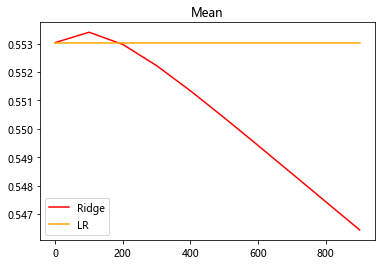

In [9]:
#交叉验证下，与线性回归相比，岭回归的结果如何变化？
alpharange = np.arange(1,1001,100)
ridge, lr = [], []
for alpha in alpharange:
    reg = Ridge(alpha=alpha)
    linear = LinearRegression()
    regs = cross_val_score(reg,X,y,cv=5,scoring = "r2").mean()
    linears = cross_val_score(linear,X,y,cv=5,scoring = "r2").mean()
    ridge.append(regs)
    lr.append(linears)
plt.plot(alpharange,ridge,color="red",label="Ridge")
plt.plot(alpharange,lr,color="orange",label="LR")
plt.title("Mean")
plt.legend()
plt.show()

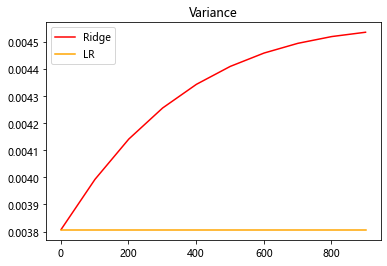

In [10]:
#细化一下学习曲线
alpharange = np.arange(1,201,10)
#模型方差如何变化？
alpharange = np.arange(1,1001,100)
ridge, lr = [], []
for alpha in alpharange:
    reg = Ridge(alpha=alpha)
    linear = LinearRegression()
    varR = cross_val_score(reg,X,y,cv=5,scoring="r2").var()
    varLR = cross_val_score(linear,X,y,cv=5,scoring="r2").var()
    ridge.append(varR)
    lr.append(varLR)
plt.plot(alpharange,ridge,color="red",label="Ridge")
plt.plot(alpharange,lr,color="orange",label="LR")
plt.title("Variance")
plt.legend()
plt.show()

d:\ProgramData\Anaconda3\envs\learn-ml\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California hou

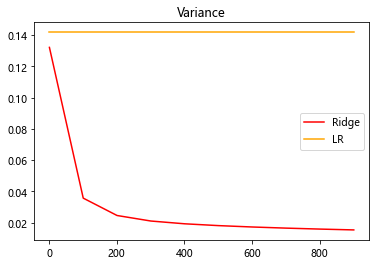

In [11]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
X = load_boston().data
y = load_boston().target
Xtrain,Xtest,Ytrain,Ytest = TTS(X,y,test_size=0.3,random_state=420)
#先查看方差的变化
alpharange = np.arange(1,1001,100)
ridge, lr = [], []
for alpha in alpharange:
    reg = Ridge(alpha=alpha)
    linear = LinearRegression()
    varR = cross_val_score(reg,X,y,cv=5,scoring="r2").var()
    varLR = cross_val_score(linear,X,y,cv=5,scoring="r2").var()
    ridge.append(varR)
    lr.append(varLR)
plt.plot(alpharange,ridge,color="red",label="Ridge")
plt.plot(alpharange,lr,color="orange",label="LR")
plt.title("Variance")
plt.legend()
plt.show()

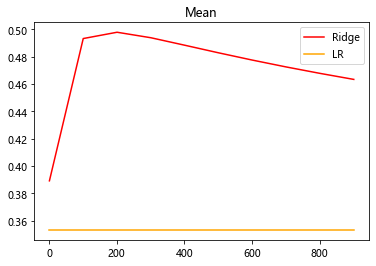

In [12]:
#查看R2的变化
alpharange = np.arange(1,1001,100)
ridge, lr = [], []
for alpha in alpharange:
    reg = Ridge(alpha=alpha)
    linear = LinearRegression()
    regs = cross_val_score(reg,X,y,cv=5,scoring = "r2").mean()
    linears = cross_val_score(linear,X,y,cv=5,scoring = "r2").mean()
    ridge.append(regs)
    lr.append(linears)
plt.plot(alpharange,ridge,color="red",label="Ridge")
plt.plot(alpharange,lr,color="orange",label="LR")
plt.title("Mean")
plt.legend()
plt.show()

Text(0.5, 1.0, 'Mean')

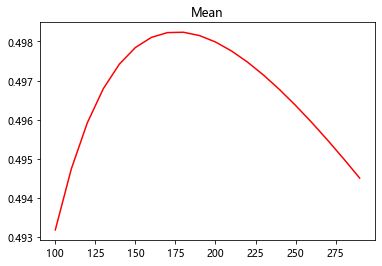

In [13]:
#细化学习曲线
alpharange = np.arange(100,300,10)
ridge, lr = [], []
for alpha in alpharange:
    reg = Ridge(alpha=alpha)
    #linear = LinearRegression()
    regs = cross_val_score(reg,X,y,cv=5,scoring = "r2").mean()
    #linears = cross_val_score(linear,X,y,cv=5,scoring = "r2").mean()
    ridge.append(regs)
    lr.append(linears)
plt.plot(alpharange,ridge,color="red",label="Ridge")
#plt.plot(alpharange,lr,color="orange",label="LR")
plt.title("Mean")

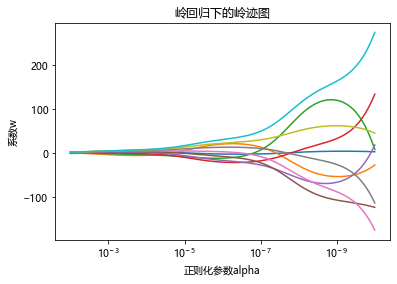

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
#创造10*10的希尔伯特矩阵
X = 1. / (np.arange(1, 11) + np.arange(0, 10)[:, np.newaxis])
y = np.ones(10)
#计算横坐标
n_alphas = 200
alphas = np.logspace(-10, -2, n_alphas)
#建模，获取每一个正则化取值下的系数组合
coefs = []
for a in alphas:
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)
#绘图展示结果
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1]) 
#将横坐标逆转
plt.xlabel('正则化参数alpha')
plt.ylabel('系数w')
plt.title('岭回归下的岭迹图')
plt.axis('tight')
plt.show()

In [15]:
import numpy as np
import pandas as pd
from sklearn.linear_model import RidgeCV, LinearRegression
from sklearn.model_selection import train_test_split as TTS
from sklearn.datasets import fetch_california_housing as fch
import matplotlib.pyplot as plt
housevalue = fch()
X = pd.DataFrame(housevalue.data)
y = housevalue.target
X.columns = ["住户收入中位数","房屋使用年代中位数","平均房间数目" ,"平均卧室数目","街区人口","平均入住率","街区的纬度","街区的经度"]

In [16]:
Ridge_ = RidgeCV(alphas=np.arange(1,1001,100)
                #,scoring="neg_mean_squared_error"
                 ,store_cv_values=True
                #,cv=5
                ).fit(X, y)
#无关交叉验证的岭回归结果
Ridge_.score(X,y)

0.6060251767338437

In [17]:
#调用所有交叉验证的结果
Ridge_.cv_values_.shape

(20640, 10)

In [18]:
#进行平均后可以查看每个正则化系数取值下的交叉验证结果
Ridge_.cv_values_.mean(axis=0)

array([0.52823795, 0.52787439, 0.52807763, 0.52855759, 0.52917958,
       0.52987689, 0.53061486, 0.53137481, 0.53214638, 0.53292369])

In [19]:
#查看被选择出来的最佳正则化系数
Ridge_.alpha_

101

In [20]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, LinearRegression, Lasso
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing as fch
import matplotlib.pyplot as plt
housevalue = fch()
X = pd.DataFrame(housevalue.data)
y = housevalue.target
X.columns = ["住户收入中位数","房屋使用年代中位数","平均房间数目" ,"平均卧室数目","街区人口","平均入住率","街区的纬度","街区的经度"]
X.head()
Xtrain,Xtest,Ytrain,Ytest = TTS(X,y,test_size=0.3,random_state=420)
#恢复索引
for i in [Xtrain,Xtest]:
    i.index = range(i.shape[0])


In [21]:
#线性回归进行拟合
reg = LinearRegression().fit(Xtrain,Ytrain)
(reg.coef_*100).tolist()


[43.73589305968403,
 1.0211268294494025,
 -10.780721617317683,
 62.64338275363768,
 5.216125353123053e-05,
 -0.3348509646333473,
 -41.309593789477155,
 -42.621095362084674]

In [22]:
#岭回归进行拟合
Ridge_ = Ridge(alpha=0).fit(Xtrain,Ytrain)
(Ridge_.coef_*100).tolist()


[43.73589305968403,
 1.0211268294494154,
 -10.780721617317607,
 62.643382753637326,
 5.216125353271531e-05,
 -0.3348509646333586,
 -41.30959378947669,
 -42.62109536208426]

In [23]:
#Lasso进行拟合
lasso_ = Lasso(alpha=0).fit(Xtrain,Ytrain)
(lasso_.coef_*100).tolist()

d:\ProgramData\Anaconda3\envs\learn-ml\lib\site-packages\ipykernel_launcher.py:2: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  
d:\ProgramData\Anaconda3\envs\learn-ml\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
d:\ProgramData\Anaconda3\envs\learn-ml\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.770e+03, tolerance: 1.917e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_

[43.73589305968403,
 1.0211268294494054,
 -10.780721617317662,
 62.64338275363783,
 5.216125353266305e-05,
 -0.33485096463335706,
 -41.309593789477205,
 -42.62109536208479]

In [24]:
#岭回归进行拟合
Ridge_ = Ridge(alpha=0.01).fit(Xtrain,Ytrain)
(Ridge_.coef_*100).tolist()

[43.735757206216036,
 1.021129231812184,
 -10.780460336251682,
 62.64202320775678,
 5.217068073243963e-05,
 -0.33485065170676265,
 -41.3095714322911,
 -42.62105388932374]

In [25]:
#Lasso进行拟合
lasso_ = Lasso(alpha=0.01).fit(Xtrain,Ytrain)
(lasso_.coef_*100).tolist()

[40.10568371834487,
 1.0936292607860147,
 -3.74237636102446,
 26.524037834897218,
 0.0003525368511503943,
 -0.3207129394887799,
 -40.06483047344841,
 -40.81754399163314]

In [26]:
#加大正则项系数，观察模型的系数发生了什么变化
Ridge_ = Ridge(alpha=10**4).fit(Xtrain,Ytrain)
(Ridge_.coef_*100).tolist()

[34.62081517607694,
 1.5196170869238694,
 0.3968610529210159,
 0.9151812510354839,
 0.002173923801224844,
 -0.3476866014810102,
 -14.736963474215257,
 -13.43557610252691]

In [27]:
lasso_ = Lasso(alpha=10**4).fit(Xtrain,Ytrain)
(lasso_.coef_*100).tolist()

[0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -0.0, -0.0]

In [28]:
#看来10**4对于Lasso来说是一个过于大的取值
lasso_ = Lasso(alpha=1).fit(Xtrain,Ytrain)
(lasso_.coef_*100).tolist()

[14.581141247629423,
 0.6209347344423873,
 0.0,
 -0.0,
 -0.0002806598632901001,
 -0.0,
 -0.0,
 -0.0]

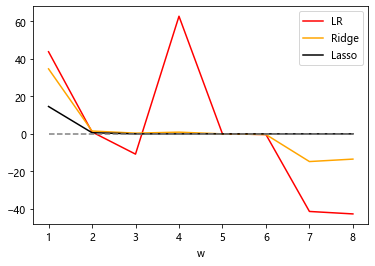

In [30]:
#将系数进行绘图
plt.plot(range(1,9),(reg.coef_*100).tolist(),color="red",label="LR")
plt.plot(range(1,9),(Ridge_.coef_*100).tolist(),color="orange",label="Ridge")
plt.plot(range(1,9),(lasso_.coef_*100).tolist(),color="k",label="Lasso")
plt.plot(range(1,9),[0]*8,color="grey",linestyle="--")
plt.xlabel('w') #横坐标是每一个特征所对应的系数
plt.legend()
plt.show()

In [32]:
from sklearn.linear_model import LassoCV
#自己建立Lasso进行alpha选择的范围
alpharange = np.logspace(-10, -2, 200,base=10)
#其实是形成10为底的指数函数
#10**(-10)到10**(-2)次方
alpharange.shape

(200,)

In [33]:
Xtrain.head()

,住户收入中位数,房屋使用年代中位数,平均房间数目,平均卧室数目,街区人口,平均入住率,街区的纬度,街区的经度
0,4.1776,35.0,4.425172,1.030683,5380.0,3.368817,37.48,-122.19
1,5.3261,38.0,6.267516,1.089172,429.0,2.732484,37.53,-122.30
2,1.9439,26.0,5.768977,1.141914,891.0,2.940594,36.02,-119.08
3,2.5000,22.0,4.916000,1.012000,733.0,2.932000,38.57,-121.31
4,3.8250,34.0,5.036765,1.098039,1134.0,2.779412,33.91,-118.35


In [36]:
lasso_ = LassoCV(alphas=alpharange #自行输入的alpha的取值范围
             ,cv=5 #交叉验证的折数
             ).fit(Xtrain, Ytrain)
# 查看被选择出来的最佳正则化系数
lasso_.alpha_

0.0020729217795953697

In [37]:
#调用所有交叉验证的结果
lasso_.mse_path_

array([[0.52454913, 0.49856261, 0.55984312, 0.50526576, 0.55262557],
       [0.52361933, 0.49748809, 0.55887637, 0.50429373, 0.55283734],
       [0.52281927, 0.49655113, 0.55803797, 0.5034594 , 0.55320522],
       [0.52213811, 0.49574741, 0.55731858, 0.50274517, 0.55367515],
       [0.52155715, 0.49505688, 0.55669995, 0.50213252, 0.55421553],
       [0.52106069, 0.49446226, 0.55616707, 0.50160604, 0.55480104],
       [0.5206358 , 0.49394903, 0.55570702, 0.50115266, 0.55541214],
       [0.52027135, 0.49350539, 0.55530895, 0.50076146, 0.55603333],
       [0.51995825, 0.49312085, 0.5549639 , 0.50042318, 0.55665306],
       [0.5196886 , 0.49278705, 0.55466406, 0.50013007, 0.55726225],
       [0.51945602, 0.49249647, 0.55440306, 0.49987554, 0.55785451],
       [0.51925489, 0.49224316, 0.55417527, 0.49965404, 0.55842496],
       [0.51908068, 0.49202169, 0.55397615, 0.49946088, 0.55897049],
       [0.51892938, 0.49182782, 0.55380162, 0.49929206, 0.55948886],
       [0.51879778, 0.49165759, 0.

In [41]:
lasso_.mse_path_.shape #返回每个alpha下的五折交叉验证结果

(200, 5)

In [40]:
lasso_.mse_path_.mean(axis=1) #有注意到在岭回归中我们的轴向是axis=0吗？

array([0.52816924, 0.52742297, 0.5268146 , 0.52632488, 0.52593241,
       0.52561942, 0.52537133, 0.5251761 , 0.52502385, 0.52490641,
       0.52481712, 0.52475046, 0.52470198, 0.52466795, 0.52464541,
       0.52463188, 0.5246254 , 0.52462436, 0.52462744, 0.52463361,
       0.52464201, 0.52465199, 0.52466301, 0.52467466, 0.5246866 ,
       0.5246986 , 0.52471046, 0.52472203, 0.5247332 , 0.52474392,
       0.52475413, 0.52476379, 0.52477291, 0.52478147, 0.52478949,
       0.52479697, 0.52480393, 0.52481039, 0.52481639, 0.52482193,
       0.52482706, 0.52483179, 0.52483615, 0.52484016, 0.52484385,
       0.52484725, 0.52485036, 0.52485322, 0.52485584, 0.52485824,
       0.52486044, 0.52486246, 0.5248643 , 0.52486599, 0.52486753,
       0.52486895, 0.52487024, 0.52487141, 0.52487249, 0.52487348,
       0.52487437, 0.52487519, 0.52487594, 0.52487663, 0.52487725,
       0.52487782, 0.52487834, 0.52487882, 0.52487925, 0.52487965,
       0.52488001, 0.52488033, 0.52488063, 0.52488091, 0.52488

In [42]:
#在岭回归当中，我们是留一验证，因此我们的交叉验证结果返回的是，每一个样本在每个alpha下的交叉验证结果
#因此我们要求每个alpha下的交叉验证均值，就是axis=0，跨行求均值
#而在这里，我们返回的是，每一个alpha取值下，每一折交叉验证的结果
#因此我们要求每个alpha下的交叉验证均值，就是axis=1，跨列求均值
#最佳正则化系数下获得的模型的系数结果
lasso_.coef_

array([ 4.29867301e-01,  1.03623683e-02, -9.32648616e-02,  5.51755252e-01,
        1.14732262e-06, -3.31941716e-03, -4.10451223e-01, -4.22410330e-01])

In [43]:
lasso_.score(Xtest,Ytest)

0.6038982670571438

In [44]:
#与线性回归相比如何？
reg = LinearRegression().fit(Xtrain,Ytrain)
reg.score(Xtest,Ytest)

0.6043668160178818

In [46]:
#使用lassoCV自带的正则化路径长度和路径中的alpha个数来自动建立alpha选择的范围
ls_ = LassoCV(eps=0.00001
     ,n_alphas=300
     ,cv=5
         ).fit(Xtrain, Ytrain)
ls_.alpha_
ls_.alphas_ #查看所有自动生成的alpha取值
ls_.alphas_.shape
ls_.score(Xtest,Ytest)
ls_.coef_

array([ 4.29785372e-01,  1.03639989e-02, -9.31060823e-02,  5.50940621e-01,
        1.15407943e-06, -3.31909776e-03, -4.10423420e-01, -4.22369926e-01])